In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Import dataset

In [2]:
eim = pd.read_csv("EIM_Train.csv")

### Deskripsi dataset

In [3]:
df = eim
df.head()

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,...,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,...,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,...,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Annually,Value,Large,229.67,17.19,1.77,0.75,6.52,...,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,NaN,Growth,Medium,111.36,12.15,1.01,0.62,3.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4,2.0


## Eksplorasi sederhana

**Drop column that NaN values more than 50%**

In [7]:
def drop_columns_with_nulls_over_threshold(df):
    """
    Drop columns from the DataFrame where the percentage of NaN values is greater than the specified threshold.
    
    Parameters:
    df (DataFrame): The input DataFrame.
    threshold (float): The threshold percentage of NaN values to drop the columns.
    
    Returns:
    DataFrame: A DataFrame with the specified columns dropped.
    """
    # Calculate the number of NaNs and the percentage for each column
    col_na = df.isnull().sum()
    percent = (col_na / len(df)) * 100
    threshold = 50.0
    
    # Create a DataFrame with the counts and percentages
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    # Find columns where the percentage of NaNs is greater than the threshold
    cols_to_drop = missing_data[missing_data['Percent'] > threshold].index
    
    # Drop these columns
    df_dropped = df.drop(columns=cols_to_drop)
    
    # Return the DataFrame with the columns dropped
    return df_dropped


In [8]:
df_exploration_cleaned = drop_columns_with_nulls_over_threshold(df)

**Drop row data when there is NaN values**

In [9]:
df_exploration_cleaned.dropna(inplace=True)

**5 besar Investment Management berdasarkan dana kelolaan (fund_size)**

In [10]:
df_sort_fundsize = df_exploration_cleaned.copy()
df_sort_fundsize = df_sort_fundsize[["ticker", "category", "equity_style", "equity_size", "fund_size_currency", "fund_size"]]
df_sort_fundsize = df_sort_fundsize.sort_values("fund_size", ascending=False)
df_sort_fundsize.head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
13404,0P0000M85L,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11
20334,0P0000M691,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11
18285,0P0000GH37,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11
18982,0P0000NNC0,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11
18749,0P0000I5O4,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11


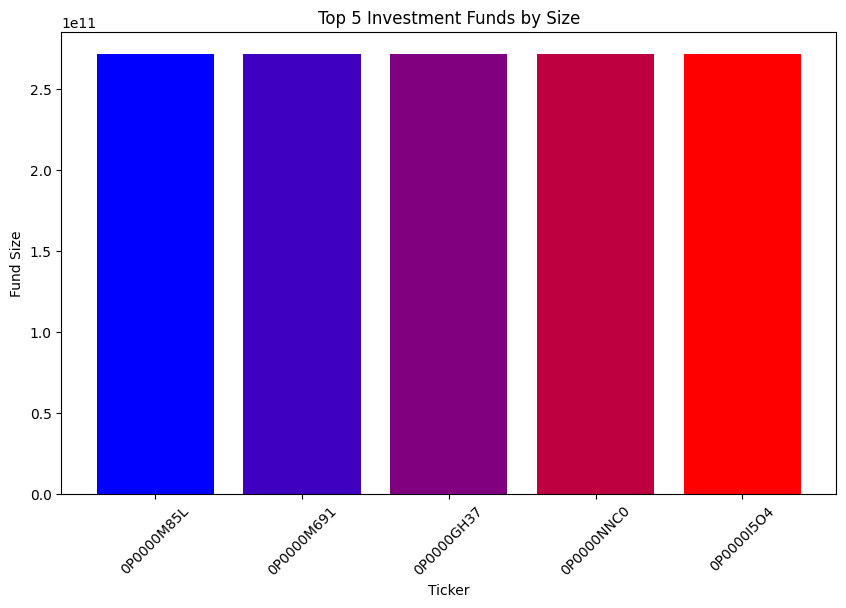

In [11]:
import matplotlib.pyplot as plt

# Assuming 'df_sort_fundsize' is already sorted and contains the necessary data
# For demonstration, I'll use the top 5 data points we previously identified
# But the actual visualization will use the user's df_sort_fundsize DataFrame

# Sample data (to be replaced with actual data from df_sort_fundsize)
tickers = df_sort_fundsize.head()["ticker"]
fund_sizes = df_sort_fundsize.head()["fund_size"]

colors = [(x, 0, 1-x) for x in np.linspace(0, 1, len(tickers))]
# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(tickers, fund_sizes, color = colors)
plt.xlabel('Ticker')
plt.ylabel('Fund Size')
plt.title('Top 5 Investment Funds by Size')
plt.xticks(rotation=45)
plt.show()


In [12]:
currency_unique_value = df_exploration_cleaned["fund_size_currency"].unique()
currency_unique_value

array(['USD', 'JPY', 'GBP', 'EUR', 'NOK', 'AUD', 'CHF', 'HKD', 'CAD'],
      dtype=object)

In [13]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "USD"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
2675,0P0000X1TM,US Large-Cap Blend Equity,Blend,Large,USD,4.111922e+10
7703,0P0000OO1Z,US Large-Cap Blend Equity,Blend,Large,USD,4.111922e+10
18247,0P0000OO20,US Large-Cap Blend Equity,Blend,Large,USD,4.111922e+10
21509,0P0000SM09,US Large-Cap Blend Equity,Blend,Large,USD,4.111922e+10
12223,0P0000OO21,US Large-Cap Blend Equity,Blend,Large,USD,4.111922e+10


In [14]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "JPY"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
13404,0P0000M85L,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11
20334,0P0000M691,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11
18285,0P0000GH37,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11
18982,0P0000NNC0,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11
18749,0P0000I5O4,Japan Large-Cap Equity,Blend,Large,JPY,2.715304e+11


In [15]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "GBP"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
5612,F00000LWVH,UK Large-Cap Equity,Blend,Large,GBP,1.171602e+10
5524,F00000UDZ8,UK Large-Cap Equity,Blend,Large,GBP,1.163587e+10
12526,F00000UDZ6,UK Large-Cap Equity,Blend,Large,GBP,1.163587e+10
12765,F00000UDZ7,UK Large-Cap Equity,Blend,Large,GBP,1.163587e+10
19619,F000003YD7,US Large-Cap Blend Equity,Blend,Large,GBP,9.161920e+09


In [16]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "EUR"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
5133,F00000U3S5,EUR Moderate Allocation - Global,Growth,Large,EUR,2.406739e+10
7790,F00000V4O9,GBP Moderate Allocation,Growth,Large,EUR,2.406739e+10
6427,F00000UQKT,USD Moderate Allocation,Growth,Large,EUR,2.406739e+10
13157,F00000TEQQ,USD Moderate Allocation,Growth,Large,EUR,2.406739e+10
19243,F00000PWRO,GBP Moderate Allocation,Growth,Large,EUR,2.403284e+10


In [17]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "NOK"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
4171,0P00008WHN,Global Emerging Markets Equity,Value,Large,NOK,1.431642e+10
2086,0P0000CNVV,Global Emerging Markets Equity,Value,Large,NOK,1.431642e+10
6954,0P0000GGNN,Global Emerging Markets Equity,Value,Large,NOK,1.431642e+10
7144,0P0000GGNP,Global Emerging Markets Equity,Value,Large,NOK,1.431642e+10
4169,0P0000GGNO,Global Emerging Markets Equity,Value,Large,NOK,1.431642e+10


In [18]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "AUD"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
21322,0P0000ZN09,Australia & New Zealand Equity,Blend,Large,AUD,438750000.0
16857,0P0000HYCL,Australia & New Zealand Equity,Blend,Large,AUD,94980000.0
18213,0P0000HYCM,Australia & New Zealand Equity,Blend,Large,AUD,94980000.0
18132,0P0000M6LP,Australia & New Zealand Equity,Blend,Large,AUD,94980000.0
7836,0P0000THJW,Australia & New Zealand Equity,Blend,Large,AUD,94980000.0


In [19]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "CHF"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
8465,F00000Q3YB,CHF Cautious Allocation,Blend,Large,CHF,1.584330e+09
11082,F0GBR04AHJ,CHF Cautious Allocation,Blend,Large,CHF,1.581890e+09
20142,F0GBR04AHT,CHF Cautious Allocation,Blend,Large,CHF,1.577930e+09
4009,F0GBR04SR9,CHF Moderate Allocation,Blend,Large,CHF,1.338390e+09
17055,F0GBR04AI1,CHF Moderate Allocation,Blend,Large,CHF,1.338390e+09


In [20]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "HKD"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
5545,F000005HYF,China Equity,Blend,Large,HKD,494260000.0
4919,F000005HYW,China Equity,Blend,Large,HKD,494260000.0
18281,F00000IR4I,China Equity,Blend,Large,HKD,494260000.0


In [21]:
df_sort_fundsize[df_sort_fundsize["fund_size_currency"] == "CAD"].head()

,ticker,category,equity_style,equity_size,fund_size_currency,fund_size
19388,0P0000MOC3,Canada Equity,Blend,Large,CAD,2.853640e+09
10826,0P0000MOBZ,Canada Equity,Blend,Large,CAD,2.853640e+09
10394,0P00014CR8,Canada Equity,Blend,Large,CAD,2.853640e+09
7595,0P0000M64M,Canada Equity,Blend,Large,CAD,2.853640e+09
20817,0P00016SQT,Canada Equity,Blend,Large,CAD,2.842770e+09


In [22]:
grouped = df_sort_fundsize.groupby("category")["fund_size"].mean()
sorted_df_groupby = grouped.sort_values(ascending=False).reset_index()
sorted_df_groupby.head()

,category,fund_size
0,Japan Large-Cap Equity,3.463947e+10
1,Japan Flex-Cap Equity,3.101172e+10
2,EUR Moderate Allocation - Global,6.022865e+09
3,USD Aggressive Allocation,5.003828e+09
4,USD Moderate Allocation,4.297630e+09


C:\Users\Valencius Apriady\AppData\Local\Temp\ipykernel_21744\3973298763.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("viridis")


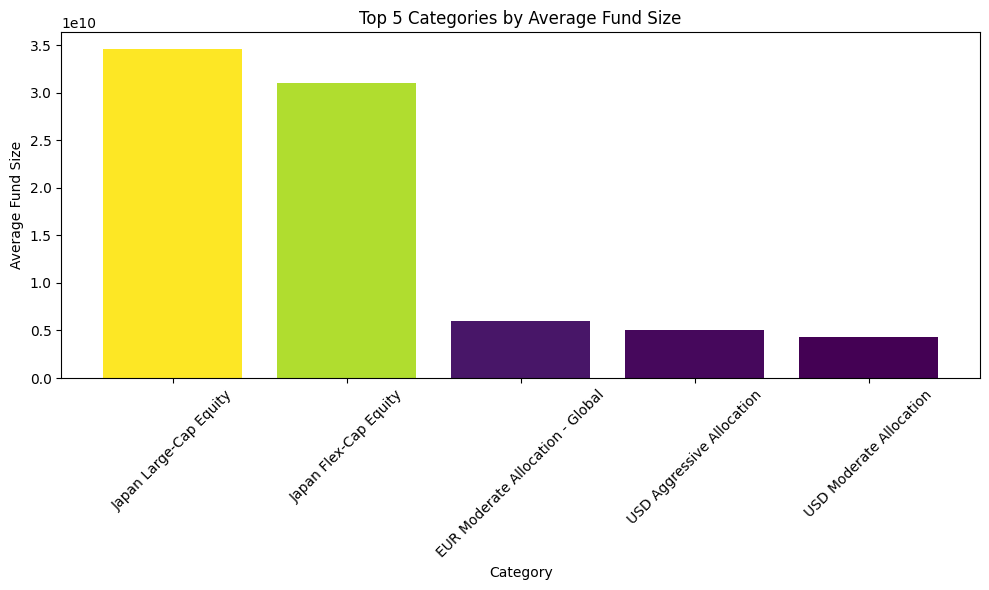

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_sort_fundsize is your DataFrame
grouped = df_sort_fundsize.groupby("category")["fund_size"].mean()
sorted_df_groupby = grouped.sort_values(ascending=False).reset_index()

# Get the top 5 categories
top_5_categories = sorted_df_groupby.head(5)

# Create a colormap with darker colors for smaller fund sizes
colormap = plt.cm.get_cmap("viridis")
normalized_sizes = (top_5_categories["fund_size"] - top_5_categories["fund_size"].min()) / (
    top_5_categories["fund_size"].max() - top_5_categories["fund_size"].min()
)
colors = colormap(normalized_sizes)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_categories["category"], top_5_categories["fund_size"], color=colors)

# Adding labels and title
plt.xlabel("Category")
plt.ylabel("Average Fund Size")
plt.title("Top 5 Categories by Average Fund Size")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


**Tunjukkan perbandingan untuk tiap sektor (sector_*)**

In [24]:
sectors = []
for column in df_exploration_cleaned.columns:
    if column[:6] == "sector":
        sectors.append(column)

sectors

['sector_basic_materials',
 'sector_consumer_cyclical',
 'sector_financial_services',
 'sector_real_estate',
 'sector_consumer_defensive',
 'sector_healthcare',
 'sector_utilities',
 'sector_communication_services',
 'sector_energy',
 'sector_industrials',
 'sector_technology']

In [25]:
sectors.append("rating")
sectors.append("long_term_projected_earnings_growth")
sectors

['sector_basic_materials',
 'sector_consumer_cyclical',
 'sector_financial_services',
 'sector_real_estate',
 'sector_consumer_defensive',
 'sector_healthcare',
 'sector_utilities',
 'sector_communication_services',
 'sector_energy',
 'sector_industrials',
 'sector_technology',
 'rating',
 'long_term_projected_earnings_growth']

In [26]:
sector_data = df_exploration_cleaned[sectors]
sector_data.head()

,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,rating,long_term_projected_earnings_growth
3,3.01,14.47,13.86,1.73,11.37,10.43,1.39,8.46,3.27,16.32,15.68,2.0,7.77
6,4.23,19.34,11.85,3.28,7.59,4.04,0.48,13.15,2.30,4.96,28.77,3.0,12.29
11,3.85,10.69,13.83,0.50,7.60,13.07,0.77,12.35,1.86,7.95,27.52,3.0,9.91
14,7.03,9.50,12.98,1.82,7.01,13.65,0.73,14.86,2.39,7.83,22.20,3.0,8.78
16,7.56,7.34,19.75,8.06,1.26,2.59,4.42,9.55,1.44,2.54,35.49,3.0,7.05


In [27]:
sector_data = df_exploration_cleaned[sectors]
columns_to_exclude = ["rating", "long_term_projected_earnings_growth"]

columns_to_scale = [col for col in sector_data.columns if col not in columns_to_exclude]

data_to_scale = df_exploration_cleaned[columns_to_scale]

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(data_to_scale)

# Create a DataFrame with the scaled values and the same column names
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df.index = df_exploration_cleaned.index

# Add back the columns that were excluded from scaling
scaled_df[columns_to_exclude] = df_exploration_cleaned[columns_to_exclude]

# Display the scaled DataFrame
scaled_df.head()


,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,rating,long_term_projected_earnings_growth
3,-0.888843,0.557871,-0.369489,-0.503652,0.463708,-0.085517,-0.781488,-0.140896,-0.149348,0.992813,0.098467,2.0,7.77
6,-0.593431,1.486584,-0.694902,0.035832,-0.317688,-1.191380,-1.097521,0.964371,-0.341685,-1.062723,1.650718,3.0,12.29
11,-0.685445,-0.162977,-0.374346,-0.931759,-0.315621,0.371366,-0.996807,0.775839,-0.428931,-0.521697,1.502490,3.0,9.91
14,0.084564,-0.389911,-0.511958,-0.472327,-0.437585,0.471742,-1.010699,1.367357,-0.323839,-0.543411,0.871628,3.0,8.78
16,0.212899,-0.801825,0.584084,1.699530,-1.626217,-1.442319,0.270800,0.115978,-0.512211,-1.500610,2.447596,3.0,7.05


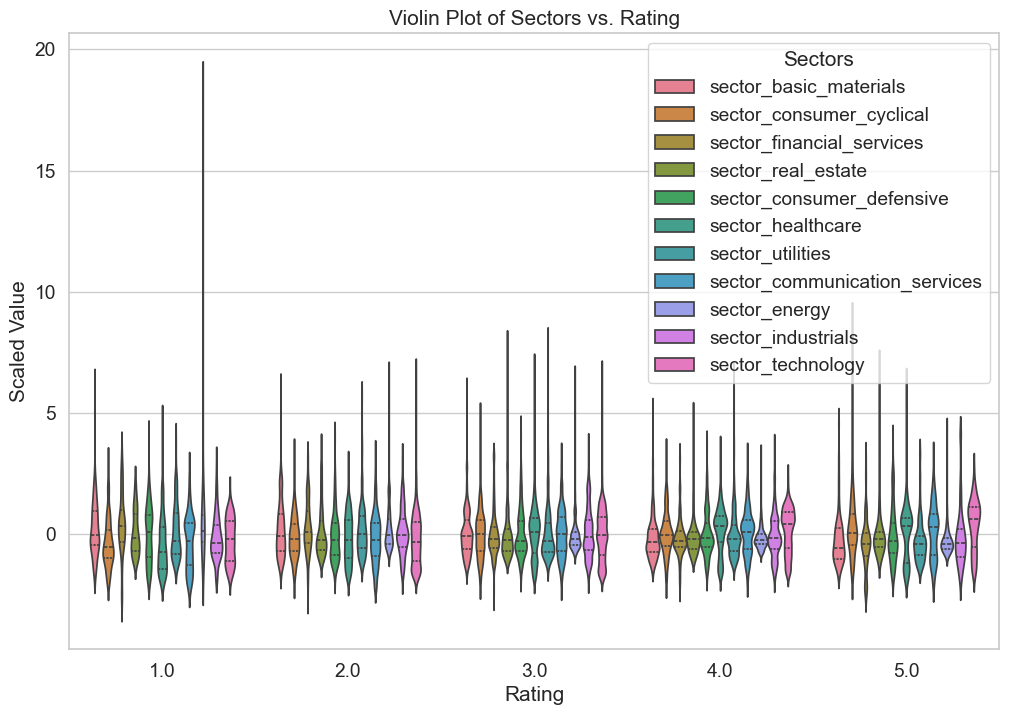

In [28]:
sns.set(style="whitegrid", font_scale=1.25)


# Define the columns you want to include in the violin plot
columns_to_include = ['sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services',
                       'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare',
                       'sector_utilities', 'sector_communication_services', 'sector_energy',
                       'sector_industrials', 'sector_technology', 'rating']

# Create a new DataFrame with the selected columns
plot_data = scaled_df[columns_to_include]

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x="rating", y="value", hue="variable", data=plot_data.melt("rating"), inner="quart")
plt.title("Violin Plot of Sectors vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Scaled Value")
plt.legend(title="Sectors")
plt.show()

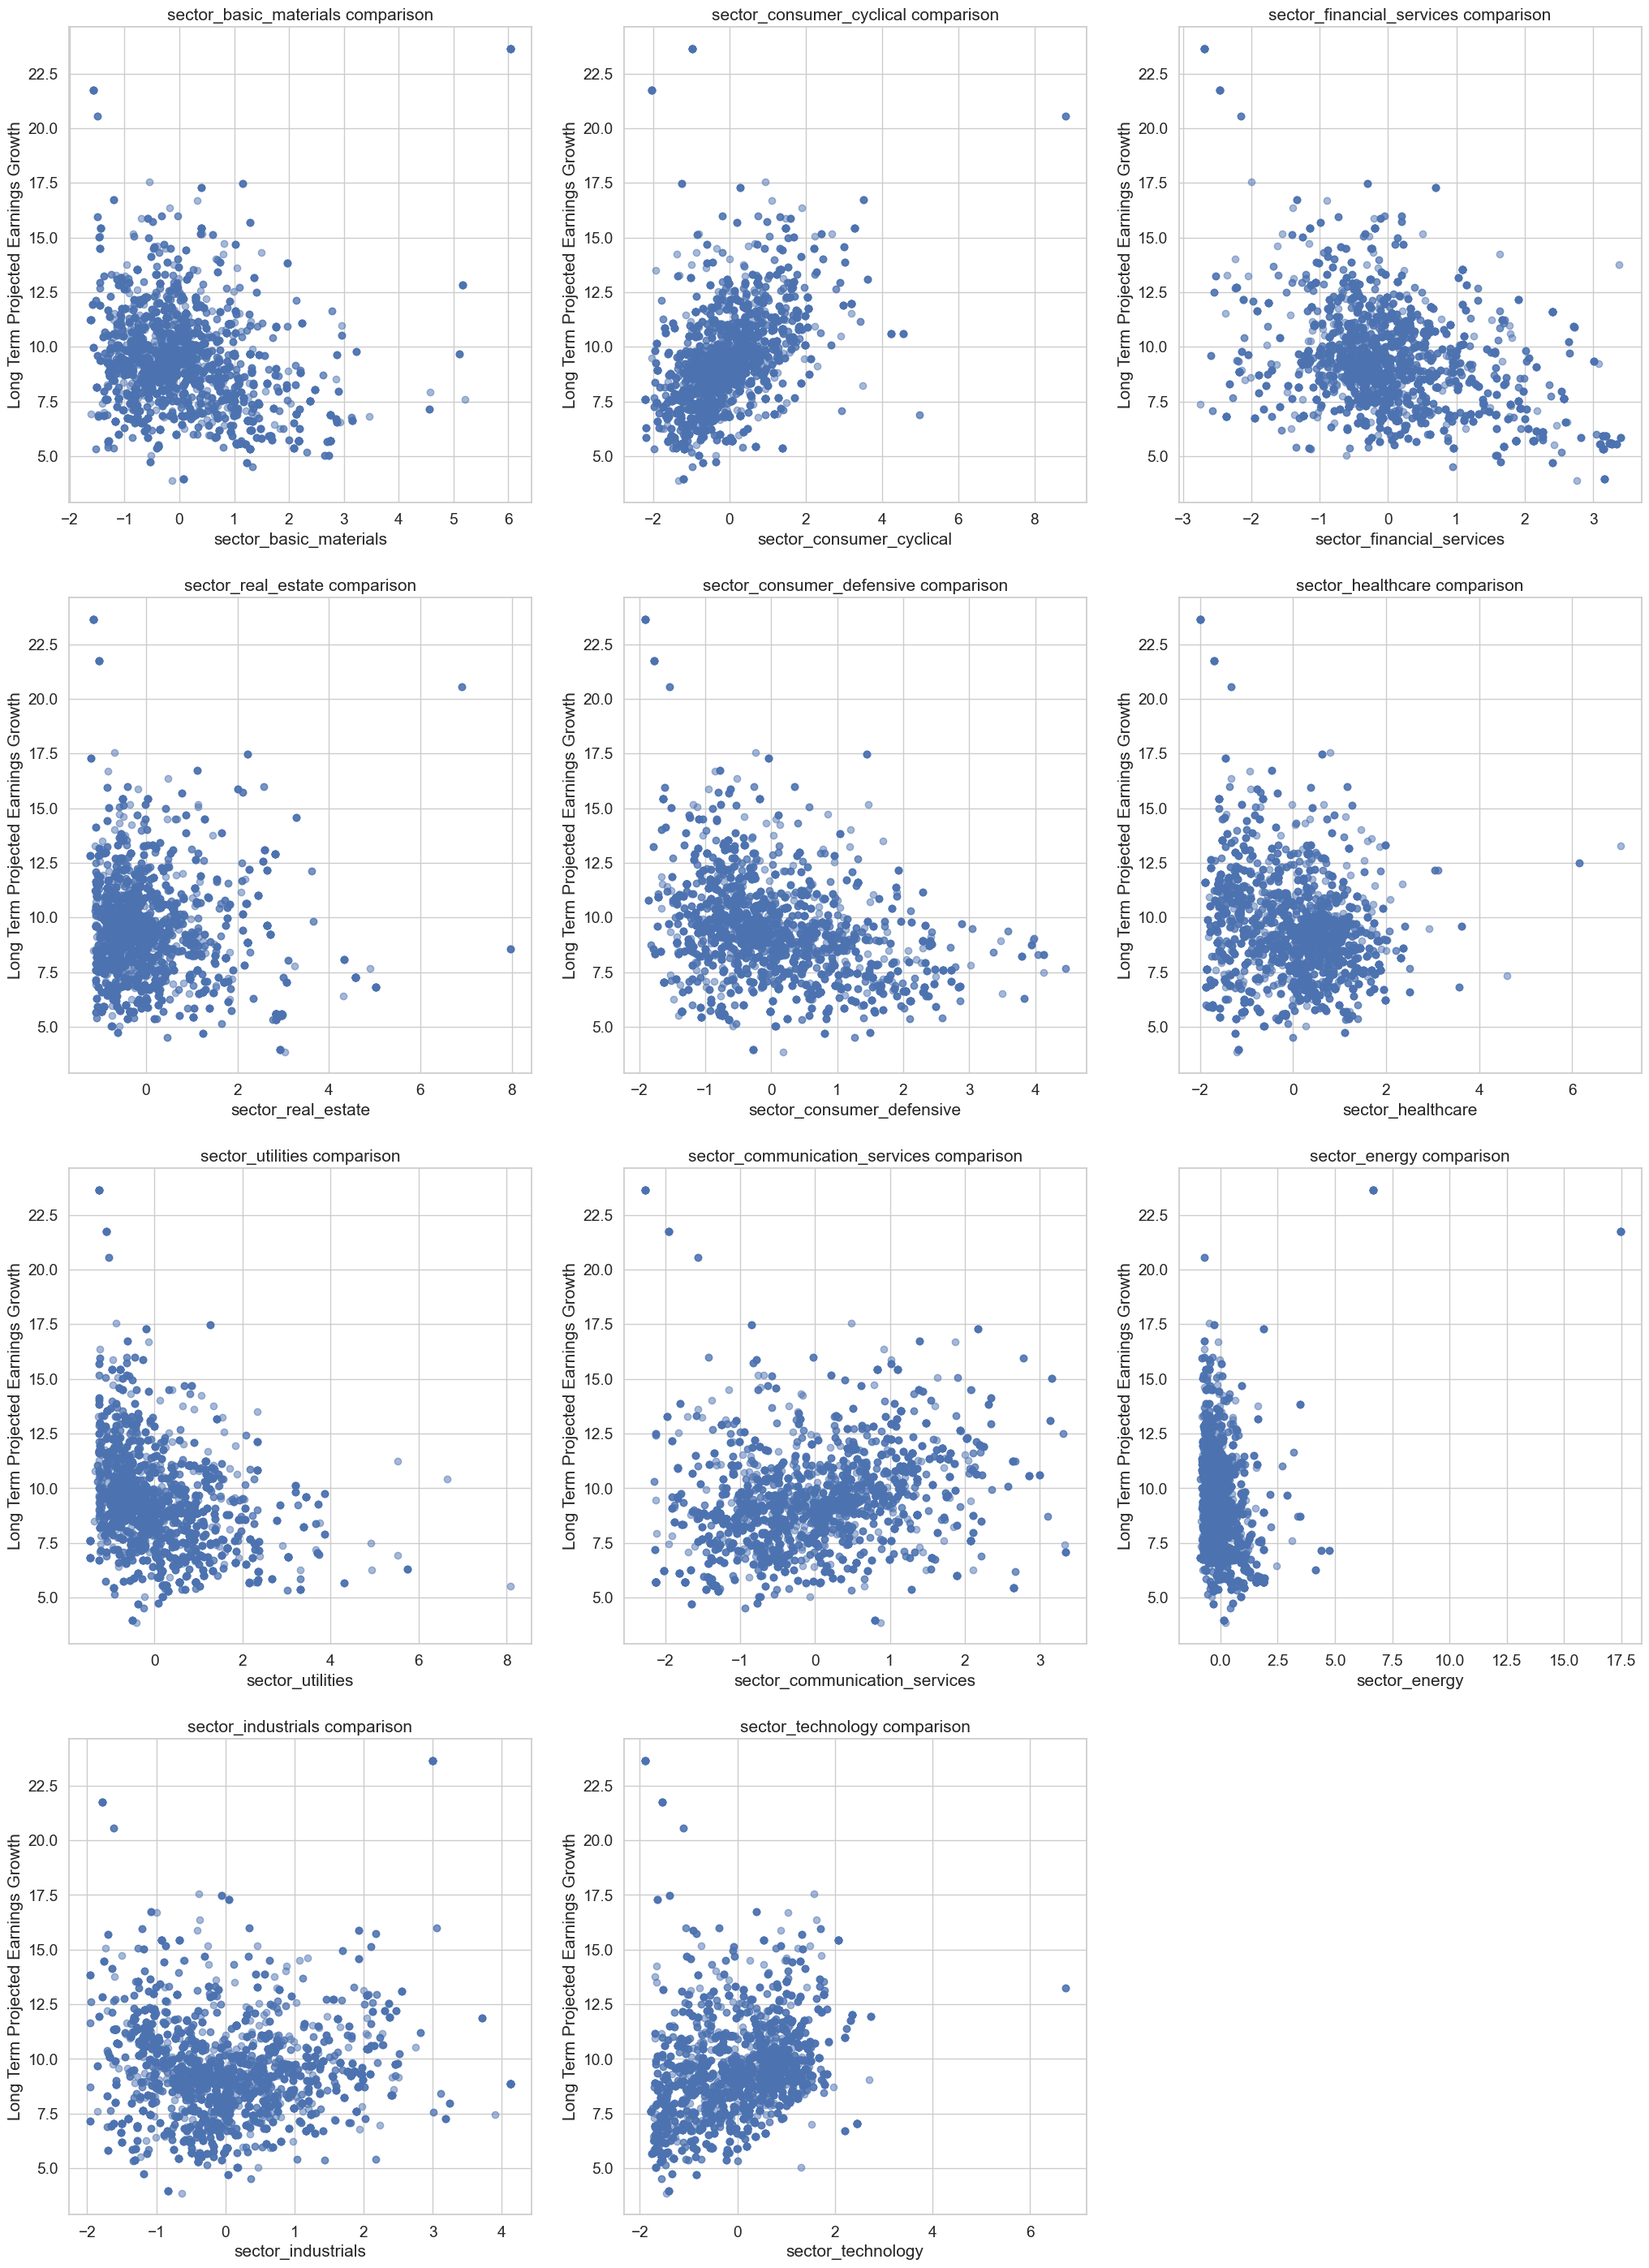

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data in the 'scaled_df' DataFrame

# Define the sectors and their corresponding indices in the DataFrame
sectors = [
    'sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services',
    'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare',
    'sector_utilities', 'sector_communication_services', 'sector_energy',
    'sector_industrials', 'sector_technology'
]

# Create a scatter plot for each sector
plt.figure(figsize=(25, 35))
counter = 1
for sector in sectors:
    plt.subplot(4,3,counter)
    plt.scatter(scaled_df[sector], scaled_df['long_term_projected_earnings_growth'], alpha=0.5)
    plt.title(f'{sector} comparison')
    plt.xlabel(sector)
    plt.ylabel('Long Term Projected Earnings Growth')
    plt.grid(True)
    counter += 1

plt.show()


**Perbandingan equity style**

In [30]:
equity_type = df_exploration_cleaned["equity_style"].unique()
equity_type

array(['Value', 'Blend', 'Growth'], dtype=object)

need to compare those style with financial metrics

In [32]:
financial_metrics = []
for column in df_exploration_cleaned.columns:
    if column[:5] == "price":
        financial_metrics.append(column)

financial_metrics

['price_prospective_earnings',
 'price_book_ratio',
 'price_sales_ratio',
 'price_cash_flow_ratio']

In [37]:
financial_metrics.append("equity_style")

In [38]:
financial_df = df_exploration_cleaned[financial_metrics]
financial_df

,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,equity_style
3,17.19,1.77,0.75,6.52,Value
6,16.16,1.77,1.45,3.86,Blend
11,24.06,2.95,2.63,12.38,Blend
14,21.12,3.33,2.65,14.49,Blend
16,15.45,1.42,1.06,5.27,Value
...,...,...,...,...,...
22400,21.58,2.75,1.84,10.16,Growth
22403,17.19,1.77,0.75,6.52,Value
22405,8.57,1.08,0.81,5.11,Value
22409,21.12,3.33,2.65,14.49,Blend


In [39]:
financial_df.head()

,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,equity_style
3,17.19,1.77,0.75,6.52,Value
6,16.16,1.77,1.45,3.86,Blend
11,24.06,2.95,2.63,12.38,Blend
14,21.12,3.33,2.65,14.49,Blend
16,15.45,1.42,1.06,5.27,Value


In [41]:
sector_data = financial_df[financial_metrics]
columns_to_exclude = ["equity_style"]

columns_to_scale = [col for col in sector_data.columns if col not in columns_to_exclude]

data_to_scale = df_exploration_cleaned[columns_to_scale]

# Create a StandardScaler
financialScaler = StandardScaler()

# Fit and transform the data using the scaler
financial_scaled_data = financialScaler.fit_transform(data_to_scale)

# Create a DataFrame with the scaled values and the same column names
financial_scaled_df = pd.DataFrame(financial_scaled_data, columns=columns_to_scale)
financial_scaled_df.index = financial_df.index

# Add back the columns that were excluded from scaling
financial_scaled_df[columns_to_exclude] = financial_df[columns_to_exclude]

# Display the scaled DataFrame
financial_scaled_df.head()


,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,equity_style
3,-0.022524,-0.149573,-1.066933,-0.543294,Value
6,-0.260925,-0.149573,0.015759,-1.359157,Blend
11,1.567586,1.342053,1.840869,1.254057,Blend
14,0.887102,1.822407,1.871803,1.901227,Blend
16,-0.425259,-0.592004,-0.587455,-0.926688,Value


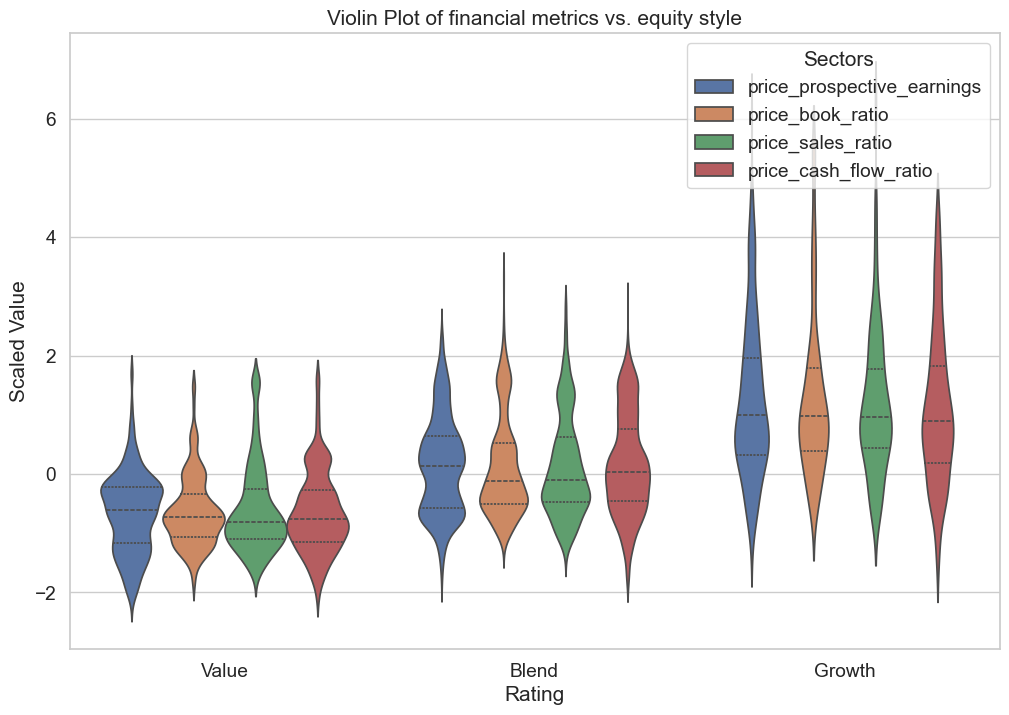

In [43]:
sns.set(style="whitegrid", font_scale=1.25)


# Define the columns you want to include in the violin plot
columns_to_include = ["price_prospective_earnings",	"price_book_ratio",	"price_sales_ratio","price_cash_flow_ratio", "equity_style"]

# Create a new DataFrame with the selected columns
plot_data = financial_scaled_df[columns_to_include]

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x="equity_style", y="value", hue="variable", data=plot_data.melt("equity_style"), inner="quart")
plt.title("Violin Plot of financial metrics vs. equity style")
plt.xlabel("Rating")
plt.ylabel("Scaled Value")
plt.legend(title="Sectors")
plt.show()

**Analisa**

From the violin plot provided, here are some inferences you can make regarding the financial metrics across different equity styles:

Price to Prospective Earnings (P/E):

The distribution for Growth equity style is wider and generally higher than for Value and Blend, indicating a broader range and generally higher P/E ratios for growth stocks.
Value equity style shows a more concentrated distribution with lower values, supporting the characteristic of value investing, which looks for stocks priced lower than their intrinsic value.
Blend equity style appears to be in between the two, showing characteristics of both Growth and Value.
Price to Book Ratio (P/B):

Similar to the P/E ratio, the Growth style shows a wider and higher distribution, suggesting that growth stocks tend to have a higher market value relative to their book value.
Value style again shows a narrower and lower distribution, indicating lower market valuation relative to book value, which is typical for value stocks.
Price to Sales Ratio (P/S):

Growth stocks show a higher P/S ratio distribution, which is consistent with growth stocks' higher valuation metrics.
Value stocks have lower P/S ratios, reinforcing the idea that these stocks are undervalued or more reasonably valued in the market.
Price to Cash Flow Ratio:

The pattern continues with Growth stocks exhibiting a higher range of cash flow ratios, indicating that investors might be expecting higher future cash flows and are willing to pay more for it now.
Value stocks show the lowest range, suggesting they are priced more conservatively in terms of cash flow.
Across all metrics, Growth stocks show higher valuation ratios, which is consistent with the growth investment style of paying a premium for stocks expected to grow faster than the market average. Value stocks show lower ratios across all metrics, which aligns with the value investment strategy of looking for stocks that the market may have undervalued. Blend stocks, as expected, tend to fall in between the two, showing characteristics of both investment styles.

These visualizations are useful for making quantitative assessments of the different investment styles. However, it's important to consider the full context of each investment, including sector trends, economic conditions, and individual company performance, before making investment decisions.

## Pembuatan Model

#### Penanganan missing value 

In [ ]:
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])


In [ ]:
check_null(df)

                                    Total    Percent
modified_duration                   20692  92.292596
effective_maturity                  20529  91.565566
bond_credit_quality                 20133  89.799286
bond_interest_rate_sensitivity      20133  89.799286
credit_a                            19897  88.746655
credit_bbb                          19897  88.746655
credit_b                            19897  88.746655
credit_below_b                      19897  88.746655
credit_not_rated                    19897  88.746655
credit_bb                           19897  88.746655
credit_aa                           19897  88.746655
credit_aaa                          19897  88.746655
average_credit_quality              19894  88.733274
holdings_n_bonds                    18291  81.583408
average_coupon_rate                 16351  72.930419
fund_trailing_return_10years        12422  55.405888
dividend_frequency                  11985  53.456735
fund_return_2015                     6604  29.

Delete feature that has more than 50% percentage null value 

In [ ]:
df.shape

(22420, 116)

In [ ]:
def drop_columns_with_nulls_over_threshold(df):
    """
    Drop columns from the DataFrame where the percentage of NaN values is greater than the specified threshold.
    
    Parameters:
    df (DataFrame): The input DataFrame.
    threshold (float): The threshold percentage of NaN values to drop the columns.
    
    Returns:
    DataFrame: A DataFrame with the specified columns dropped.
    """
    # Calculate the number of NaNs and the percentage for each column
    col_na = df.isnull().sum()
    percent = (col_na / len(df)) * 100
    threshold = 50.0
    
    # Create a DataFrame with the counts and percentages
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    # Find columns where the percentage of NaNs is greater than the threshold
    cols_to_drop = missing_data[missing_data['Percent'] > threshold].index
    
    # Drop these columns
    df_dropped = df.drop(columns=cols_to_drop)
    
    # Return the DataFrame with the columns dropped
    return df_dropped


In [ ]:
# Use the function on your DataFrame
df_cleaned = drop_columns_with_nulls_over_threshold(df)

In [ ]:
df_cleaned.shape

(22420, 99)

In [ ]:
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_cols = df_cleaned.select_dtypes(exclude=[np.number]).columns
print(f'Numerical column count: {len(numerical_cols)}')
print(f'Categorical column count: {len(categorical_cols)}')

Numerical column count: 93
Categorical column count: 6


In [ ]:
def fill_null_values(df):
    copy_df = df.copy()
    for column in copy_df.columns:
        if copy_df[column].dtype == np.number:
            mean_value = copy_df[column].mean()
            copy_df.fillna(mean_value, inplace=True)
        else:
            mode_value = copy_df[column].mode()[0]
            copy_df[column].mode()[0]
            copy_df.fillna(mode_value, inplace=True)
    return copy_df


In [ ]:
filled_df = fill_null_values(df_cleaned)

C:\Users\Valencius Apriady\AppData\Local\Temp\ipykernel_25764\1550573361.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if copy_df[column].dtype == np.number:
C:\Users\Valencius Apriady\AppData\Local\Temp\ipykernel_25764\1550573361.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Global Emerging Markets Equity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copy_df.fillna(mode_value, inplace=True)


In [ ]:
filled_df.isnull().sum()

category                               0
equity_style                           0
equity_size                            0
equity_size_score                      0
price_prospective_earnings             0
price_book_ratio                       0
price_sales_ratio                      0
price_cash_flow_ratio                  0
dividend_yield_factor                  0
long_term_projected_earnings_growth    0
historical_earnings_growth             0
sales_growth                           0
cash_flow_growth                       0
book_value_growth                      0
roa                                    0
roe                                    0
roic                                   0
asset_stock                            0
asset_bond                             0
asset_cash                             0
asset_other                            0
sector_basic_materials                 0
sector_consumer_cyclical               0
sector_financial_services              0
sector_real_esta

In [ ]:
check_null(filled_df)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
print("Jumlah duplikasi data : " + str(df_cleaned.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
import numpy as np
import pandas as pd

def check_outlier(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (numeric_cols < lower_limit) | (numeric_cols > upper_limit)
    
    # Save the current setting for max rows displayed
    previous_option = pd.get_option('display.max_rows')
    
    # Set the option to None to display all rows
    pd.set_option('display.max_rows', None)
    
    # Print the sum of outliers for each column
    print("Outlier pada tiap atribut:")
    print(outliers.sum())
    
    # Reset the max rows displayed to its original setting
    pd.set_option('display.max_rows', previous_option)

    return outliers

# Use the function on your DataFrame
outliers = check_outlier(df)


Outlier pada tiap atribut:
equity_size_score                       906
price_prospective_earnings              866
price_book_ratio                       1257
price_sales_ratio                      1384
price_cash_flow_ratio                   780
dividend_yield_factor                   705
long_term_projected_earnings_growth    1485
historical_earnings_growth              752
sales_growth                           1305
cash_flow_growth                       1718
book_value_growth                      1187
roa                                     568
roe                                     540
roic                                    731
average_coupon_rate                     297
average_credit_quality                  181
modified_duration                        28
effective_maturity                       96
asset_stock                            4672
asset_bond                             5384
asset_cash                             2232
asset_other                            3848
secto

In [ ]:
from scipy import stats

def remove_outliers(df, cat_col, threshold=3):
    z_scores = stats.zscore(df.drop(cat_col, axis=1))
    outliers = np.abs(z_scores) > threshold
    filtered_rows = np.any(outliers, axis=1)
    cleaned_data = df[~filtered_rows].reset_index(drop=True)
    
    return cleaned_data

In [ ]:
cat_col = filled_df.select_dtypes('object').columns.tolist()
done_df = remove_outliers(filled_df, cat_col)